# 2. Methods & Results

This section describes the complete analytical workflow used to answer our research question: <br>
**To what extent do age (in years) and total hours played predict whether a player is classified as an experienced player?**
<br>
<br>


**Load Required Packages and Data:**

In [15]:
library(tidyverse)
library(janitor)
library(readr)
library(dplyr)
library(ggplot2)
library(tidyr)

players <- read_csv("players.csv") |> clean_names()
sessions <- read_csv("sessions.csv") |> clean_names()

players |> head()
sessions |> head()

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashed_email,played_hours,name,gender,age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


hashed_email,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


<br>

**Data Wrangling and Cleaning:**

In [16]:
data <- players |>
  select(hashed_email, experience, age, played_hours) |>
  mutate(
    experience = factor(experience),
    played_hours = replace_na(played_hours, 0))
data

hashed_email,experience,age,played_hours
<chr>,<fct>,<dbl>,<dbl>
f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,Pro,9,30.3
f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,Veteran,17,3.8
b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,Veteran,17,0.0
23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,Amateur,21,0.7
7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,Regular,21,0.1
f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,Amateur,17,0.0
8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,Regular,19,0.0
1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,Amateur,21,0.0
8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,Amateur,47,0.1


<br>

**Summary Statistics:**

In [17]:
data |>
  summarize(
    mean_age = mean(age, na.rm = TRUE),
    sd_age = sd(age, na.rm = TRUE),
    mean_hours = mean(played_hours, na.rm = TRUE),
    sd_hours = sd(played_hours, na.rm = TRUE)
  )

mean_age,sd_age,mean_hours,sd_hours
<dbl>,<dbl>,<dbl>,<dbl>
21.13918,7.389687,5.845918,28.35734


<br>

**Visualization 1 - Distribution of Total Hours Played:**

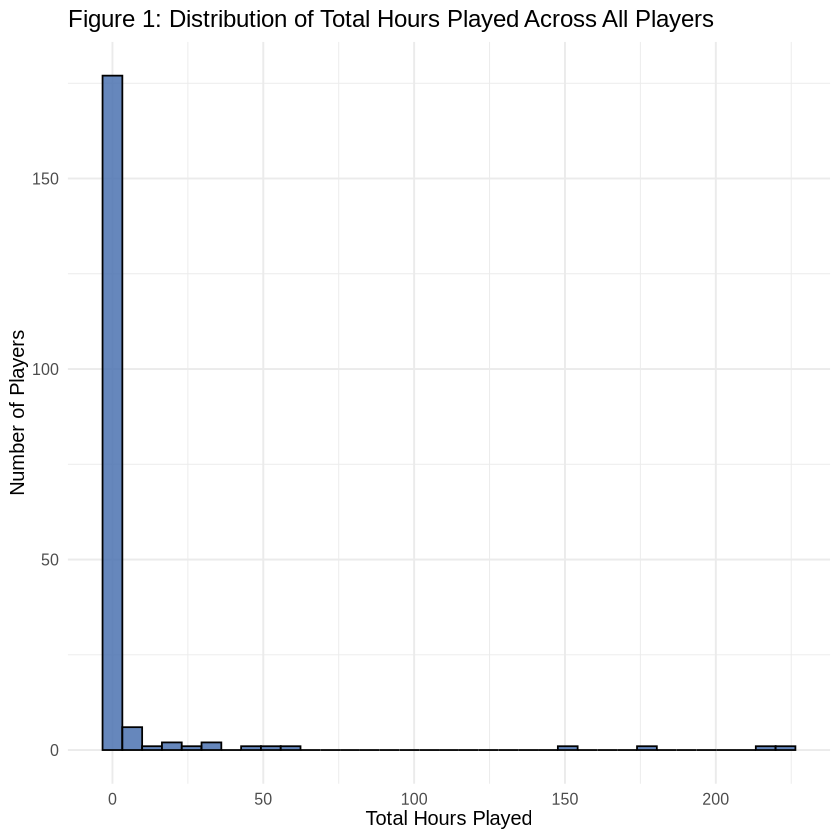

In [31]:
totalplayed_hours <- ggplot(data, aes(x = played_hours)) +
  geom_histogram(
    fill = "#4C72B0",
    color = "black",
    bins = 35,
    alpha = 0.85) +
  labs(title = "Figure 1: Distribution of Total Hours Played Across All Players",
    x = "Total Hours Played",
    y = "Number of Players") +
theme_minimal(base_size = 12)

totalplayed_hours

<br>

**Visualization 2 — Comparison of Age by Experience Level:**

Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


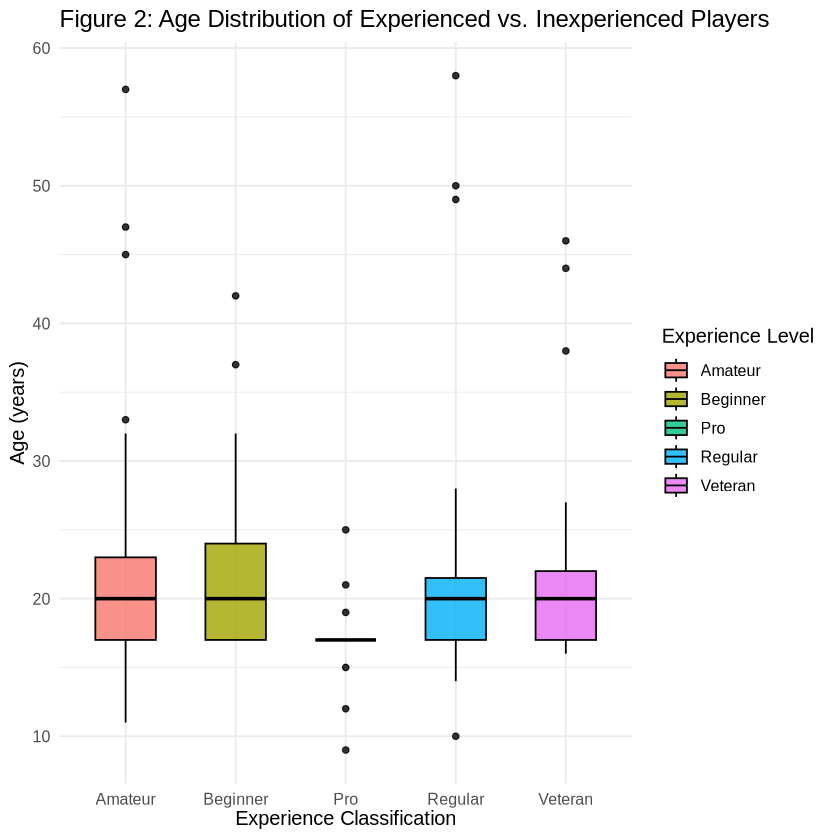

In [32]:
experience_level <- ggplot(data, aes(x = experience, y = age, fill = experience)) +
  geom_boxplot(alpha = 0.8, width = 0.55, color = "black") +
  labs(title = "Figure 2: Age Distribution of Experienced vs. Inexperienced Players",
    x = "Experience Classification",
    y = "Age (years)",
    fill = "Experience Level") +
 theme_minimal(base_size = 12) 

experience_level

<br>

**Visualization 3 - Total Hours Played by Experience Level:**

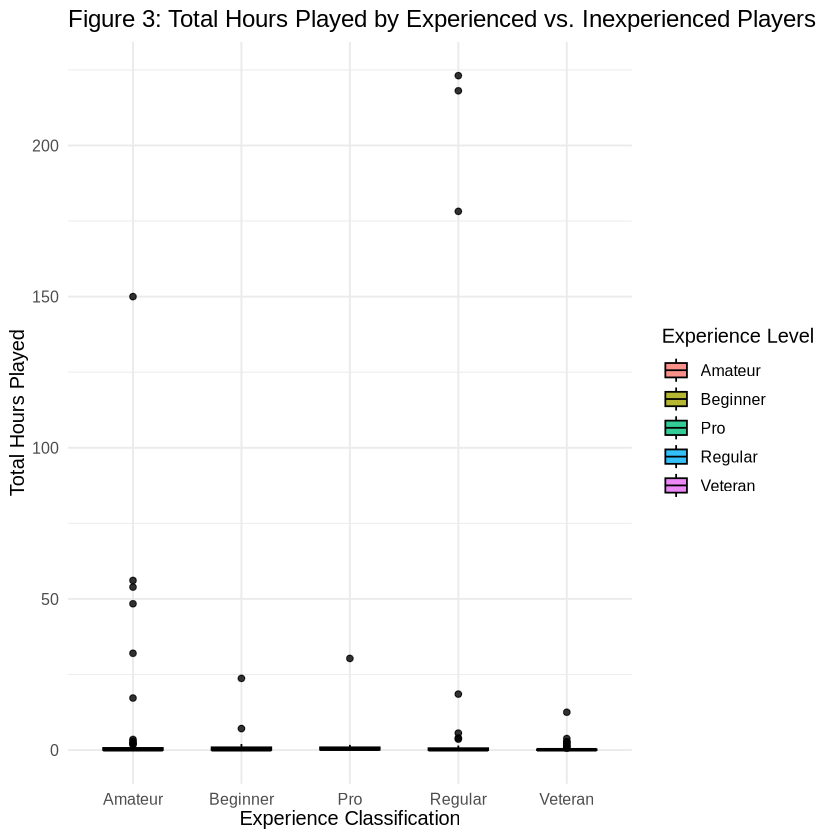

In [33]:
played_experience <- ggplot(data, aes(x = experience, y = played_hours, fill = experience)) +
  geom_boxplot(alpha = 0.8, width = 0.55, color = "black") +
  labs(title = "Figure 3: Total Hours Played by Experienced vs. Inexperienced Players",
    x = "Experience Classification",
    y = "Total Hours Played",
    fill = "Experience Level") +
theme_minimal(base_size = 12)

played_experience 

<br>

**Visualization 4 - Age vs. Hours Played, Colored by Experience:**

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


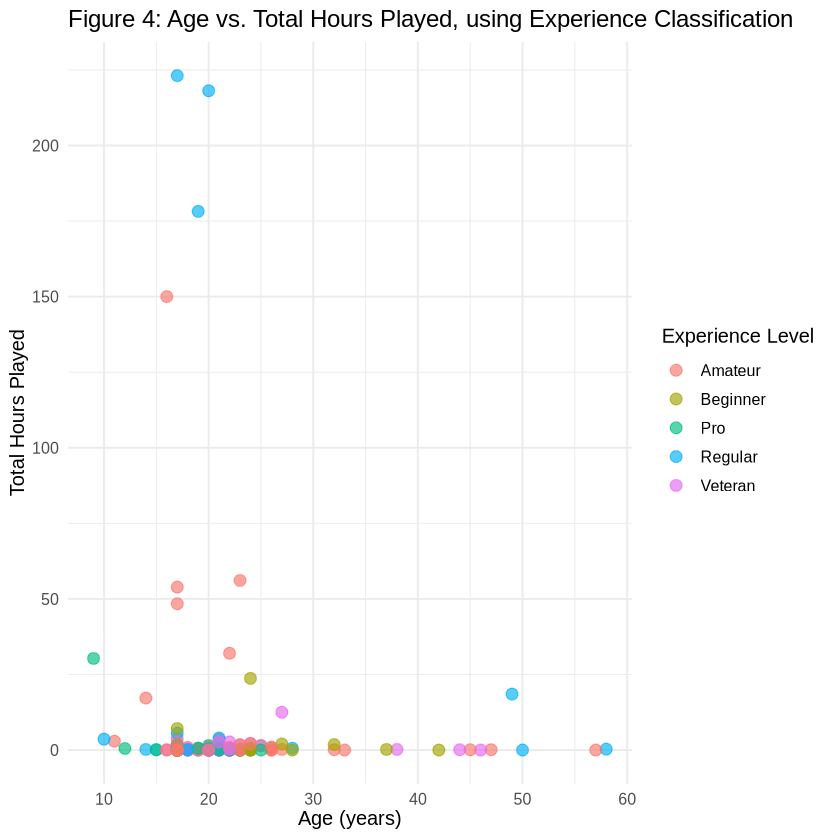

In [38]:
age_played <- ggplot(data, aes(x = age, y = played_hours, color = experience)) +
  geom_point(alpha = 0.65, size = 3) +
  labs(title = "Figure 4: Age vs. Total Hours Played, using Experience Classification",
    x = "Age (years)",
    y = "Total Hours Played",
    color = "Experience Level") +
theme_minimal(base_size = 12)

age_played